In [264]:
import ctypes
import os
import numpy as np
import matplotlib.pyplot as plt

In [272]:
lib = ctypes.cdll.LoadLibrary("lib/GPsimple.so")
lib.performGP.argtypes = [np.ctypeslib.ndpointer(np.float32, flags='aligned, c_contiguous'),
                              np.ctypeslib.ndpointer(np.float32, flags='aligned, c_contiguous'),
                              np.ctypeslib.ndpointer(np.float32, flags='aligned, c_contiguous'),
                              np.ctypeslib.ndpointer(np.float32, flags='aligned, c_contiguous'),
                              np.ctypeslib.ndpointer(np.float32, flags='aligned, c_contiguous'),
                              ctypes.c_int,
                              ctypes.c_int]

In [273]:
x = np.arange(0,6,1).astype(np.float32)
y = np.random.rand(x.size).astype(np.float32)
x_fit = np.arange(0, 6, 0.1).astype(np.float32)
y_fit = np.zeros(x_fit.size).astype(np.float32)
y_error = np.zeros(x_fit.size).astype(np.float32)

In [274]:
lib.performGP(x, y, x_fit, y_fit, y_error, x.size, x_fit.size)

y_error = np.sqrt(abs(y_error))

#print(y_error)
#print(y_fit)

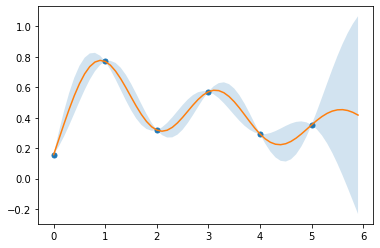

In [275]:
plt.plot(x, y, ".", markersize=10)
plt.plot(x_fit,y_fit)
plt.fill_between(x_fit, y_fit + y_error, y_fit - y_error, alpha=0.2)

In [269]:
# Original Data consists of 83x45 pixels. This is too large for GPs.
# Therefore we downsample both the transfermatrix and the emmision data
def downsample_2x(mat):
    orig_dtype = mat.dtype
    mat = mat.astype(float)
    mat = (mat[...,1::2,:] + mat[...,:-1:2,:])/2.
    mat = (mat[...,:,1::2] + mat[...,:,:-1:2])/2.
    return mat.astype(orig_dtype)

(128, 42, 23)


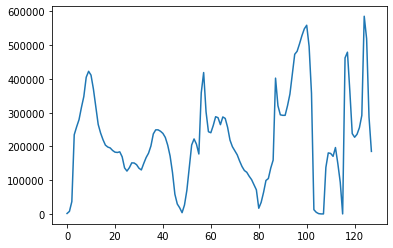

In [270]:
measurement = np.loadtxt("ForwardModel/results/measurement/NN_ 66_meas.txt")
plt.plot(measurement)
transfer_mat = np.zeros((128, 85, 47))
transfer_mat[:,1:-1,1:-1] = np.loadtxt("data/transfermatrix.dat").reshape(128,83,45)
transfer_mat = 4*downsample_2x(transfer_mat)
print(transfer_mat.shape)